In [1]:

import copy
import sys
from typing import Dict, List, Tuple
from pandas import DataFrame, to_datetime, Series

from freqtrade import (DependencyException, OperationalException, exchange, persistence)
from freqtrade.arguments import Arguments
from freqtrade.configuration import Configuration
from freqtrade.analyze import Analyze
from freqtrade.exchange import get_ticker_history
from freqtrade.logger import Logger
from freqtrade.persistence import Trade, Pair
from freqtrade.optimize import load_tickerdata_file



from scipy import linspace, polyval, polyfit, sqrt, stats, randn
from pylab import plot, title, show , legend
from freqtrade.indicators import in_range
# import operator

import numpy as np
import matplotlib.pyplot as plt

# ZigZag

# This is inside your IPython Notebook
import pyximport
pyximport.install(reload_support=True)
from freqtrade.vendor.zigzag import *
# from zigzag import *


# pair = "BTC/USDT"
pair = "ETH/BTC"
timeframes = ['5m']

# timeframe = 1000

sysargv=['-s', 'trend001', '-c', '../config_testing.json']

arguments = Arguments(
    sysargv,
    'Simple High Frequency Trading Bot for crypto currencies'
)
args = arguments.get_parsed_arg()

# Initialize all modules
configuration = Configuration(args)
config = configuration.get_config()
analyze = Analyze(config)

logger = Logger(name=__name__, level=config.get('loglevel')).get_logger()

persistence.init(config)
exchange.init(config)

interval = analyze.get_ticker_interval()


def get_df(pair: str, interval: str) -> DataFrame:
    """
    Calculates current signal based several technical analysis indicators
    :param pair: pair in format ANT/BTC
    :param interval: Interval to use (in min)
    :return: (Buy, Sell) A bool-tuple indicating buy/sell signal
    """
    print('interval : ',interval)
    
    
#     ticker_hist = get_ticker_history(pair, interval)
    ticker_hist = load_tickerdata_file('../freqtrade/tests/testdata_long/', pair, interval)
#     print (ticker_hist)
#     print (ticker_hist)
    if not ticker_hist:
        logger.warning('Empty ticker history for pair %s', pair)
        return None

    try:
        dataframe = analyze.analyze_ticker(ticker_hist, pair= pair)
    except ValueError as error:
        logger.warning(
            'Unable to analyze ticker for pair %s: %s',
            pair,
            str(error)
        )
        return None
    except Exception as error:
        logger.exception(
            'Unexpected error when analyzing ticker for pair %s: %s',
            pair,
            str(error)
        )
        return None
    
    return dataframe


dfs = {}
for t in timeframes:
    dfs[t] = get_df(pair=pair, interval=t)


# whitelist = copy.deepcopy(config['exchange']['pair_whitelist'])

# for _pair in whitelist:
#     df = get_df(pair=_pair, interval=interval)
# #     print (df)
#     pivots = peak_valley_pivots(df.close.values, 0.02, -0.01)
#     print (pivots)
#     plot_pivots(df.close, pivots)
#     df[pivots] = pivots
#     gentrends(df)
#     print (df.head())



# pair_obj = Pair.query.filter(Pair.pair.is_(pair)).first()

# if pair_obj == None:
#     pair_obj = Pair(
#         pair=pair
#     )
#     Pair.session.add(pair_obj)
    
#     # trend = get_trend(pair, 30)
#     # # Not in downtrend in the last 24hrs
#     # if trend != 1:
#     #     sanitized_whitelist.remove(pair)
#     Pair.session.flush()



# def get_tests(df, trend_name):
#     t_r = df.loc[in_range(df['high'],df[trend_name], 0.00001) | in_range(df['low'],df[trend_name], 0.00001)]
#     return t_r



2018-05-03 18:38:47,551 - freqtrade.configuration - INFO - Using config: ../config_testing.json ...
2018-05-03 18:38:47,552 - freqtrade.configuration - INFO - Validating configuration ...
2018-05-03 18:38:47,556 - freqtrade.configuration - INFO - Log level set at 20
2018-05-03 18:38:47,558 - freqtrade.configuration - INFO - Using max_open_trades: 50 ...
2018-05-03 18:38:47,558 - freqtrade.configuration - INFO - Parameter --datadir detected: freqtrade/tests/testdata ...
2018-05-03 18:38:47,561 - freqtrade.strategy.strategy - INFO - Load strategy class: DefaultStrategy (user_data.strategies.trend001.py)
2018-05-03 18:38:47,569 - freqtrade.exchange - INFO - Instance is running with dry_run enabled
2018-05-03 18:38:47,571 - freqtrade.exchange - INFO - Using Exchange "Bittrex"
2018-05-03 18:38:47,578 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTPS connection (1): bittrex.com


interval :  5m


5756


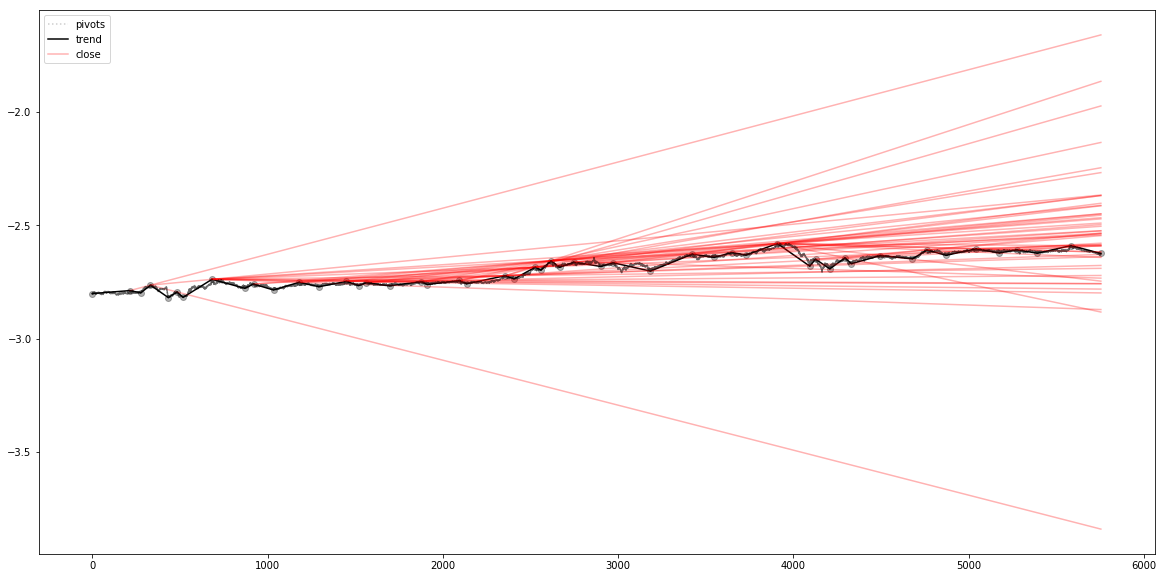

In [2]:


def get_tests(df, trend_name):
    trend = df[trend_name]
    t_r = df.loc[in_range(df['high'],trend, 0.00001) | in_range(df['low'],trend, 0.00001)]
#     print (len(t_r))
    return t_r

def gentrends(df, charts=True, pair='default_filename_plot'):

    h = df.loc[df['pivots']==1]
    l = df.loc[df['pivots']==-1]
    
    print (len(df))
    

    trend_h = []
    tests = 50
#     trends_strength = {}

    for i in range(0, len(h) - 1):

        ax = h.index[i]
        ay = h.iloc[i].close
#         print ('a', ax, ay)
        bx = h.index[i+1]
        by = h.iloc[i+1].close
        t = df.index[ax:]
        trend_name = 'trend_'+str(ax)+'-'+str(bx)

        slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
        trend_h = polyval([slope,intercept],t)
        df.loc[h.index[i]:,trend_name] = trend_h
#         print (df)
        
#         t_r = get_tests(df, trend_name)
        
#         if len(t_r) > tests:
#             plt.plot(t, trend_h, 'r', label=trend_name, alpha=0.5)
#             for it in range(0, len(t_r)):
#                 plt.scatter(t_r.index[it], t_r.iloc[it].close, color='c')


#         next_waves = df.loc[df['pivots']==1][i+1:]
        next_waves = h[i+1:]
#         print ('point A: ', ax, 'c: ', ay, '-------------------------------------------------')
        for ib in range(0, len(next_waves)):
            bx = next_waves.index[ib]
            by = next_waves.iloc[ib].close

#             print(df[df.high > df ])

#             print ('\t\tpoint B: ', bx, 'c: ', next_waves.iloc[ib].close, 'trend_point: ', df.loc[bx][trend_name])

            if by > df.loc[bx][trend_name]:
                t = df.index[h.index[i]:]
                slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
                trend_next_wave = polyval([slope,intercept],t)
                trend_name = 'trend_'+str(ax)+'-'+str(bx)
                df.loc[h.index[i]:,trend_name] = trend_next_wave
                plt.plot(t, trend_next_wave, 'r', label=trend_name, alpha=0.3)
#                 t_r = get_tests(df, trend_name)
#                 if len(t_r) > tests:
#                     plt.plot(t, trend_next_wave, 'r', label=trend_name, alpha=0.5)
#                     for it in range(0, len(t_r)):
#                         plt.scatter(t_r.index[it], t_r.iloc[it].close, color='c')



        
#     for i in range(0, len(l)-1):

#         ax = l.index[i]
#         ay = l.iloc[i].close
# #         print ('a', ax, ay)
#         bx = l.index[i+1]
#         by = l.iloc[i+1].close
#         t = df.index[ax:]
#         trend_name = str(ax)+'-'+str(bx)

#         slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
#         trend = polyval([slope,intercept],t)
#         plt.plot(t, trend, 'g', label='fitted line', alpha=0.5)
#         df.loc[l.index[i]:,trend_name] = trend

#         plt.scatter(ax, ay, color='r')
#         plt.scatter(bx, by, color='r')

#         next_waves = l[i+1:]
#         for ib in range(0, len(next_waves)):
#             bx = next_waves.index[ib]
#             if next_waves.iloc[ib].close < df.loc[bx][trend_name]:
#                 t = df.index[l.index[i]:]
#                 bx = next_waves.index[ib]
#                 by = next_waves.iloc[ib].close
#                 slope, intercept, r_value, p_value, std_err = stats.linregress([ax, bx], [ay, by])
#                 trend_next_wave = polyval([slope,intercept],t)
#                 trend_name = 'trend_'+str(ax)+'-'+str(bx)
#                 df.loc[l.index[i]:,trend_name] = trend_next_wave
#                 plt.plot(t, trend_next_wave, 'g', label='fitted line', alpha=0.3)
    return df

from math import sqrt


#     timeframe_volat = {
#                     '1d':0.02,
#                     '1h':0.015,
#                     '5m':0.008,
#                     '1m':0.005}

timeframe_volat = {
                '1d':1.1,
                '1h':0.0009,
                '5m':5,
                '1m':5}

# Plots

def plot_pivots(X, pivots):
    plt.plot(np.arange(len(X)), X, 'k:', alpha=0.2)
    plt.plot(np.arange(len(X))[pivots != 0], X[pivots != 0], 'k-')
    plt.scatter(np.arange(len(X))[pivots == 1], X[pivots == 1], color='k', alpha=0.3)
    plt.scatter(np.arange(len(X))[pivots == -1], X[pivots == -1], color='k', alpha=0.3)
#     plt.show()
    pass

for t in timeframes:

    df_long = dfs[t]
    timeframe = 2000
    df = df_long
#     volat = sqrt(df['stddev'].mean()) * timeframe_volat[t]
#     print (volat)
#     volat = timeframe_volat[t]
    df['bb_exp'] = (df.bb_upperband - df.bb_lowerband) / df.bb_middleband * timeframe_volat[t]
    pivots = peak_valley_pivots(df.close.values, df.bb_exp.values)
    df['pivots'] = np.transpose(np.array((pivots)))

#     df['pct_change'] = df.close.pct_change()
#     df['bb_upperband'] = np.log(df.bb_upperband)
#     df['bb_middleband'] = np.log(df.bb_middleband)
#     df['bb_lowerband'] = np.log(df.bb_lowerband)
    
#     print (df.bb_exp)
    plt.figure(num=0, figsize=(20,10))

#     print(df)
    # eje y en log scale

#     plt.yscale('log')
    
#     plt.xlim(0, len(df.close))
#     plt.ylim(df.close.min()*0.99, df.close.max()*1.01)
    

    
    df['high'] = np.log(df.high)
    df['close'] = np.log(df.close)
    df['open'] = np.log(df.open)
    df['low'] = np.log(df.low)
    
    plot_pivots(df.close, pivots)
    
    gentrends(df)
    plt.plot(df.close, 'k', alpha=0.5)
    
    legend(['pivots','trend', 'close'])
    plt.show()